In [1]:
import os
import torch
from torch import nn
from prototype2 import wide_resnet
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
config = {
    "batch_size": 1,
    "dataset": "food101",
    "depth": 16,
    "epochs": 100,
    "image_size": 128,
    "lr": 0.1,
    "momentum": 0.9,
    "weight_decay": 0.0005,
    "width": 8
}

state_path = "state/best_model"
model = wide_resnet.Model(config["depth"], config["width"], num_classes=101)
model = model.to(device=DEVICE, memory_format=torch.channels_last)
model.load_state_dict(torch.load(state_path, map_location=torch.device(DEVICE)))

<All keys matched successfully>

In [3]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, Resize, CenterCrop, Normalize
TEST_DIR = "data/images/test"

transform = Compose([
    Resize((config["image_size"], config["image_size"])),
    ToTensor(),
    Normalize((0.486, 0.456, 0.406),  ## Change normalization???
                (0.229, 0.224, 0.225)),  ## Change normalization???
])
test_data = datasets.ImageFolder(root=TEST_DIR, transform=transform)
test_data_loader = DataLoader(test_data, batch_size=config["batch_size"],
                                shuffle=True, pin_memory=True, num_workers=os.cpu_count())

In [28]:
def test(data_loader, model):
    model.eval()
    size = len(data_loader.dataset)
    correct_predictions = [0] * 101
    class_counts = [0] * 101
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            pred = model(X)
            pred_result = pred.argmax(1) == y
            correct_predictions[y[0]] += 1 if pred_result[0] else 0
            class_counts[y[0]] += 1
    
    return correct_predictions, class_counts

In [29]:
result, counts = test(test_data_loader, model)
print(result)
print(counts)

[86, 148, 168, 206, 156, 147, 209, 204, 112, 104, 145, 214, 164, 190, 158, 124, 175, 136, 151, 168, 186, 149, 123, 177, 206, 187, 127, 193, 202, 175, 204, 164, 213, 243, 198, 192, 139, 117, 183, 92, 218, 199, 146, 175, 184, 194, 134, 142, 191, 136, 107, 196, 174, 153, 223, 154, 122, 141, 126, 153, 199, 191, 161, 208, 212, 197, 149, 112, 203, 216, 208, 163, 194, 143, 166, 227, 196, 106, 208, 195, 158, 173, 126, 197, 129, 158, 196, 142, 202, 154, 201, 214, 163, 97, 201, 157, 159, 173, 163, 131, 172]
[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 2

In [25]:
print(result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, tensor(1), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [34]:
class_percentages = [x / 250 for x in result]

In [38]:
labels = []
with open('data/meta/meta/labels.txt') as f:
    for line in f.readlines():
        labels.append(line.rstrip("\n"))
        # print(line)
        #do stuff

In [42]:
percentage_and_label = zip(labels, class_percentages)

In [46]:
final = []
for i in range(len(labels)):
    final.append((labels[i], class_percentages[i]))

In [59]:
final = sorted(final, key=lambda i: i[1], reverse=True)

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns=["food class", "accuracy"]
top5 = np.array(final[:5])
bottom5 = np.array(final[-5:])
top5_bottom5 = np.concatenate((top5, bottom5))
df = pd.DataFrame(top5_bottom5, columns=columns)
df = df.astype({'food class': 'object', 'accuracy': 'float64'})
df["rating"] = ['top5' if v > 0.5 else 'bottom5' for v in df["accuracy"]]
df["index"] = range(1,11)



df

,food class,accuracy,rating,index
0,Edamame,0.972,top5,1
1,Pho,0.908,top5,2
2,Hot and sour soup,0.892,top5,3
3,French fries,0.872,top5,4
4,Oysters,0.864,top5,5
5,Pork chop,0.424,bottom5,6
6,Breakfast burrito,0.416,bottom5,7
7,Steak,0.388,bottom5,8
8,Foie gras,0.368,bottom5,9
9,Apple pie,0.344,bottom5,10


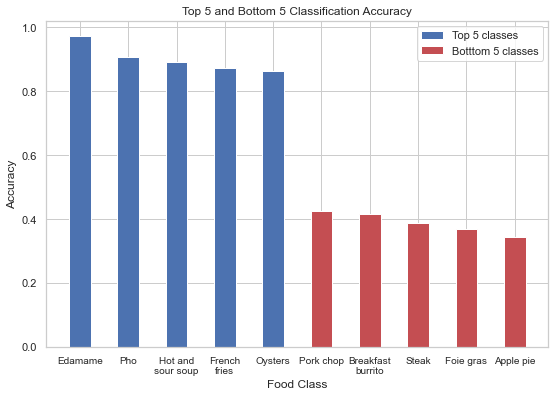

In [286]:

import textwrap
fig = plt.figure(figsize=(9,6))
bars = plt.bar(df["index"][:5], df["accuracy"][:5], width=0.45, color="b", label="Top 5 classes")
bars = plt.bar(df["index"][-5:], df["accuracy"][-5:], width=0.45, color="r", label="Botttom 5 classes")
xtick_locs, xtick_labels = plt.xticks(df["index"], df["food class"])
# for i, bar in enumerate(bars):
#     if df["accuracy"][i] > 0.5:
#         bar.set_color('b')
#         # bar.
#     else: 
#         bar.set_color('r')

plt.legend()
ax = fig.axes[0]
wrapped_labels = [textwrap.fill(l, 9) for l in df["food class"]]
ax.set_xticklabels(wrapped_labels, rotation=0, ha="center", fontweight="light", fontsize="small")

plt.title("Top 5 and Bottom 5 Classification Accuracy")
plt.xlabel("Food Class")
plt.ylabel("Accuracy")
plt.show()






In [259]:
axes

[<AxesSubplot:>]